<a href="https://colab.research.google.com/github/madanmohan-venkatesan/notebooks/blob/main/2205_14762_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

#One-Sample Distribution Function Confidence Band using DKWM inequality

In [2]:
# def ECDF(x):
#   x=np.sort(x)
#   cdf=[np.sum(x<=x[i])/len(x) for i in range(len(x))]
#   # x=np.append(np.inf,x)
#   # cdf=np.append(0,cdf)
#   return x,cdf

In [3]:
def eps(alpha,n):
  """
  alpha: significance level
  n: sample size
  """
  return np.sqrt((np.log(2/alpha))/(2*n))

In [4]:
def fn_upper(e_cdf,data,alpha):
  """
  data: sample data
  alpha: significance level
  """
  n=len(data)
  ecdf=[e_cdf(x) for x in data]
  upper_bound=ecdf+eps(alpha,n)
  return np.minimum(1,upper_bound)


In [5]:
def fn_lower(e_cdf,data,alpha):
  """
  data: sample data
  alpha: significance level
  """
  n=len(data)
  ecdf=[e_cdf(x) for x in data]
  lower_bound=ecdf-eps(alpha,n)
  return np.maximum(0,lower_bound)


In [6]:
orig_data1=np.random.normal(0,88,1000)
orig_data2=np.random.normal(1000,25,1000)
org_data=np.hstack((orig_data1,orig_data2))
sample_data=np.random.choice(org_data,50)
alpha=0.05
org_data_cdf=ECDF(org_data)# org_data_sorted,org_data_cdf=ECDF(org_data)
sample_data_cdf=ECDF(sample_data)#sample_data_sorted,sample_data_cdf=ECDF(sample_data)
sample_upper=fn_upper(sample_data_cdf,sample_data,alpha)
sample_lower=fn_lower(sample_data_cdf,sample_data,alpha)


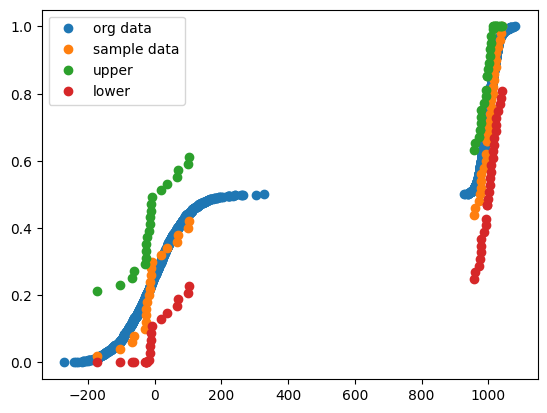

In [7]:
plt.plot(org_data,[org_data_cdf(x) for x in org_data],'o',label="org data")
plt.plot(sample_data,[sample_data_cdf(x) for x in sample_data],'o',label="sample data")
plt.plot(sample_data,sample_upper,'o',label="upper")
plt.plot(sample_data,sample_lower,'o',label="lower")
plt.legend()
plt.show()

# One sample Quantile Function Confidence Band

In [8]:
def qn(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  index=int(np.ceil(n*p))-1
  return sorted_data[index] if index > 0 else sorted_data[0]

In [9]:
def qn_upper(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  p=p+eps(alpha,n)
  index=int(np.ceil(n*p))-1
  # Ideal for right sided quantile
  # return sorted_data[index] if index < n else np.inf
  return sorted_data[index] if index < n else sorted_data[-1]


In [10]:
def qn_lower(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  p=p-eps(alpha,n)
  index=int(np.floor(n*p))+1
  #Ideal case of left sided quantile
  # return sorted_data[index] if p > 0 else np.inf
  return sorted_data[index] if p > 0 else sorted_data[0]

In [11]:
pct=np.linspace(0,1,100)
q_upper=[qn_upper(sample_data,0.05,x) for x in pct]
q_lower=[qn_lower(sample_data,0.05,x) for x in pct]
q=[qn(sample_data,0.05,x) for x in pct]

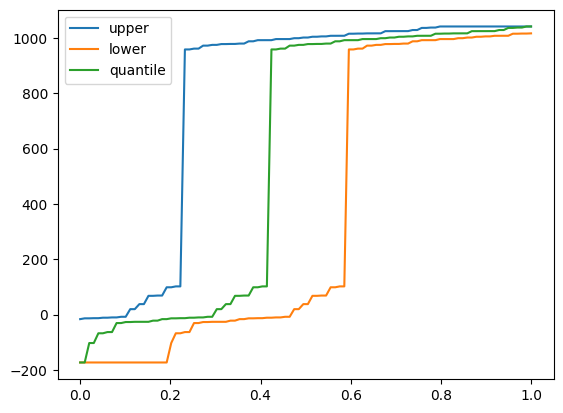

In [12]:
plt.plot(pct,q_upper,label="upper")
plt.plot(pct,q_lower,label="lower")
plt.plot(pct,q,label="quantile")
plt.legend()
plt.show()

# Two-Sample Distribution/Quantile function confidence bands

In [13]:
A=np.random.normal(0,2,1500)
B=np.random.normal(0,0.25,1500)
alp=0.05/2
A_cdf=ECDF(A)
B_cdf=ECDF(B)
A_fn_upper=fn_upper(A_cdf,A,alp)
A_fn_lower=fn_lower(A_cdf,A,alp)
B_fn_upper=fn_upper(B_cdf,B,alp)
B_fn_lower=fn_lower(B_cdf,B,alp)

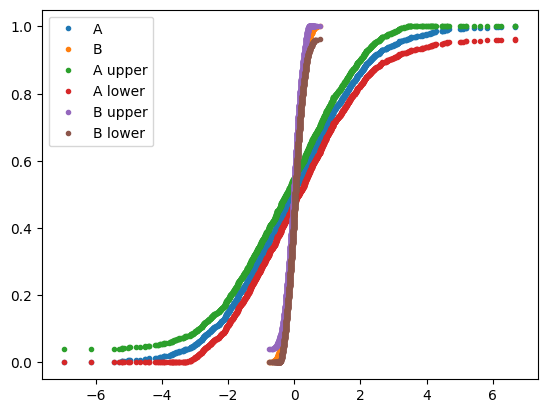

In [14]:
plt.plot(A,[A_cdf(x) for x in A],'.',label="A")
plt.plot(B,[B_cdf(x) for x in B],'.',label="B")
plt.plot(A,A_fn_upper,'.',label="A upper")
plt.plot(A,A_fn_lower,'.',label="A lower")
plt.plot(B,B_fn_upper,'.',label="B upper")
plt.plot(B,B_fn_lower,'.',label="B lower")
plt.legend()
plt.show()

In [15]:
pct=np.linspace(0,1,100)
A_qn_upper=[qn_upper(A,alp,x) for x in pct]
A_qn_lower=[qn_lower(A,alp,x) for x in pct]
A_qn=[qn(A,alp,x) for x in pct]
B_qn_upper=[qn_upper(B,alp,x) for x in pct]
B_qn_lower=[qn_lower(B,alp,x) for x in pct]
B_qn=[qn(B,alp,x) for x in pct]

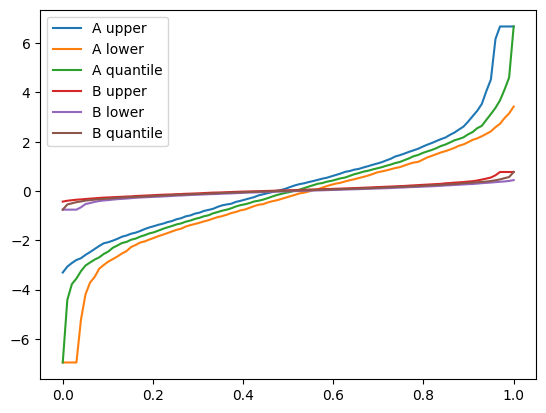

In [16]:
plt.plot(pct,A_qn_upper,label="A upper")
plt.plot(pct,A_qn_lower,label="A lower")
plt.plot(pct,A_qn,label="A quantile")
plt.plot(pct,B_qn_upper,label="B upper")
plt.plot(pct,B_qn_lower,label="B lower")
plt.plot(pct,B_qn,label="B quantile")
plt.legend()
plt.show()

# Confidence Sets on the Difference

In [17]:
# def conf_dist_diff(common_points,a_cdf_x,b_cdf_x,a_cdf_y,b_cdf_y):
#   """
#   a_cdf: cdf of sample a
#   b_cdf: cdf of sample b
#   common_points: common points of both samples
#   return: confidence set on the difference of cdfs
#   """
#   a_intr_cdf=np.interp(common_points,a_cdf_x,a_cdf_y)
#   b_intr_cdf=np.interp(common_points,b_cdf_x,b_cdf_y)
#   return b_intr_cdf-a_intr_cdf

In [18]:
def conf_dist_diff_bounds(a,b,alp,eps):
  alp=0.05
  n=len(a)
  epsilon=eps(alp/2,n)
  A_cdf=ECDF(A)
  B_cdf=ECDF(B)

  diff_upper=fn_upper(B_cdf,b,alp/2)-fn_lower(A_cdf,a,alp/2)
  diff_lower=fn_lower(B_cdf,b,alp/2)-fn_upper(A_cdf,a,alp/2)
  return diff_upper,diff_lower

In [19]:
def conf_dist_diff(a,b,alp,eps):
  alp=0.05
  n=len(a)
  epsilon=eps(alp/2,n)
  A_cdf=ECDF(A)
  B_cdf=ECDF(B)
  a_ecdf=[A_cdf(x) for x in A]
  b_ecdf=[B_cdf(x) for x in B]
  diff=np.array(b_ecdf)-np.array(a_ecdf)
  return diff

In [20]:
def conf_dist_diff_boundary(common_points,a_x,a_y,b_x,b_y):
  """
  a_x: x values of sample a
  a_y: y values of sample a
  b_x: x values of sample b
  b_y: y values of sample b
  common_points: common points of both samples
  return: confidence set on the difference of cdfs
  """
  a_intr_cdf=np.interp(common_points,a_x,a_y)
  b_intr_cdf=np.interp(common_points,b_x,b_y)
  return b_intr_cdf-a_intr_cdf


In [21]:
# common_points=np.linspace(-4,6,600)
# d_a_b=conf_dist_diff(common_points,A_sorted,B_sorted,A_cdf,B_cdf)
# dn_ab_upper=conf_dist_diff_boundary(common_points,A_sorted,A_fn_lower,B_sorted,B_fn_upper)
# dn_ab_lower=conf_dist_diff_boundary(common_points,A_sorted,A_fn_upper,B_sorted,B_fn_lower)
d_ab=conf_dist_diff(A,B,alp,eps)
d_ab_upper,d_ab_lower=conf_dist_diff_bounds(A,B,alp,eps)


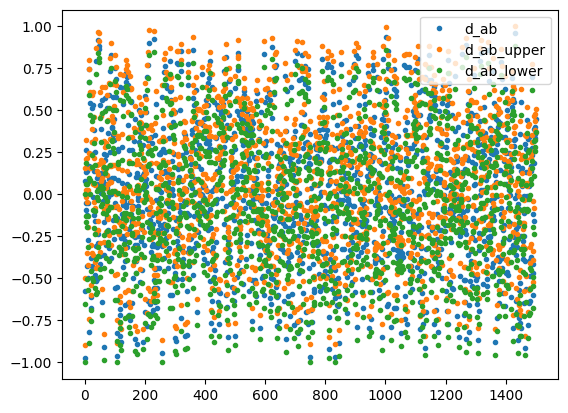

In [22]:
# plt.plot(common_points,d_a_b,label="d_a_b")
# plt.plot(common_points,dn_ab_upper,label="dn_ab_upper")
# plt.plot(common_points,dn_ab_lower,label="dn_ab_lower")
# plt.legend()
# plt.show()

plt.plot(d_ab,'.',label="d_ab")
plt.plot(d_ab_upper,'.',label="d_ab_upper")
plt.plot(d_ab_lower,'.',label="d_ab_lower")
plt.legend()
plt.show()

In [23]:
# To test F_B(x)>=F_A(x)
#Reject if True
#If rejected, accept F_A(x)>F_B(X)
d_ab_upper,d_ab_lower=conf_dist_diff_bounds(A,B,alp,eps)
np.max(d_ab_lower) > 0

np.True_

In [ ]:
def diff_conf_interval(d_ab_l,d_ab_u):
  inf_d_unab = np.min(d_ab_u)
  sup_d_lnab = np.max(d_ab_l)
  inf_d_lnab = np.min(d_ab_l)
  sup_d_unab = np.max(d_ab_u)

  l_nab_val = np.maximum(np.abs(inf_d_unab), np.abs(sup_d_lnab))
  u_nab_val = np.maximum(np.abs(inf_d_lnab), np.abs(sup_d_unab))

  return l_nab_val, u_nab_val

# Obtain tighter quantile boundaries

In [ ]:
def eps_quantiles(alpha,n):
  """
  alpha: significance level
  n: sample size
  """
  numerator=(np.log(np.log(np.exp(1)*n)))+(0.8*(np.log(1612/alpha)))
  denominator=n
  # print(n)
  # print(numerator/denominator)
  # print(np.sqrt(numerator/denominator))
  full_form=0.85*(np.sqrt(numerator/denominator))
  return full_form

In [ ]:
def qn_quantiles(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  index=int(np.ceil(n*p))-1
  return sorted_data[index] if index > 0 else sorted_data[0]

In [ ]:
def qn_upper_quantiles(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  p=p+eps_quantiles(alpha,n)
  index=int(np.ceil(n*p))-1
  # Ideal case for right sided quantiles
  # return sorted_data[index] if index < n else np.inf
  return sorted_data[index] if index < n else sorted_data[-1]

In [ ]:
def qn_lower_quantiles(data,alpha,p):
  """
  data: sample data
  alpha: significance level
  p: quantile
  """
  sorted_data=np.sort(data)
  n=len(sorted_data)
  p=p-eps_quantiles(alpha,n)
  index=int(np.floor(n*p))+1
  # Ideal case for left sided quantiles
  # return sorted_data[index] if p > 0 else np.inf
  return sorted_data[index] if p > 0 else sorted_data[0]

In [ ]:
A=np.random.normal(10,2,600)
B=np.random.normal(7,0.25,600)
alp=0.05/2

In [ ]:
pct=np.linspace(0,1,100)
A_qn_upper=[qn_upper_quantiles(A,alp,x) for x in pct]
A_qn_lower=[qn_lower_quantiles(A,alp,x) for x in pct]
A_qn=[qn_quantiles(A,alp,x) for x in pct]
B_qn_upper=[qn_upper_quantiles(B,alp,x) for x in pct]
B_qn_lower=[qn_lower_quantiles(B,alp,x) for x in pct]
B_qn=[qn_quantiles(B,alp,x) for x in pct]

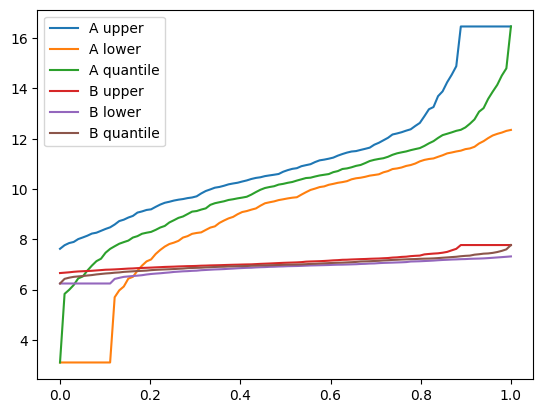

In [ ]:
plt.plot(pct,A_qn_upper,label="A upper")
plt.plot(pct,A_qn_lower,label="A lower")
plt.plot(pct,A_qn,label="A quantile")
plt.plot(pct,B_qn_upper,label="B upper")
plt.plot(pct,B_qn_lower,label="B lower")
plt.plot(pct,B_qn,label="B quantile")
plt.legend()
plt.show()

In [ ]:
qn_ab_upper=np.subtract(B_qn_upper,A_qn_lower)
qn_ab_lower=np.subtract(B_qn_lower,A_qn_upper)
qn_ab=np.subtract(B_qn,A_qn)

In [ ]:
qn_ab_upper

array([ 3.55693214,  3.57148726,  3.58653908,  3.60677223,  3.62047639,
        3.62985271,  3.63862802,  3.64701513,  3.66083262,  3.67435891,
        3.68908243,  3.6940889 ,  1.1069824 ,  0.84410577,  0.70272853,
        0.3979942 ,  0.33407268,  0.10116062, -0.09207306, -0.25354936,
       -0.32565431, -0.5322212 , -0.68500566, -0.80946579, -0.90557454,
       -0.95478992, -1.01736104, -1.14324718, -1.19283594, -1.28275815,
       -1.31071616, -1.32597079, -1.41862919, -1.50483339, -1.54946595,
       -1.68224924, -1.77076693, -1.84996823, -1.90431168, -2.00762549,
       -2.08850011, -2.12278052, -2.17561779, -2.21413157, -2.31485657,
       -2.40295858, -2.43523112, -2.46212762, -2.50460369, -2.52885156,
       -2.5568895 , -2.57927998, -2.59152123, -2.68490205, -2.76293568,
       -2.84535304, -2.89295875, -2.94740464, -2.9661184 , -3.01917172,
       -3.04248552, -3.07648714, -3.09083251, -3.12430162, -3.18817554,
       -3.22357515, -3.23855706, -3.26928476, -3.30727333, -3.32

In [ ]:
qn_ab_lower[np.isfinite(qn_ab_lower)].max()

-1.3803864195940392

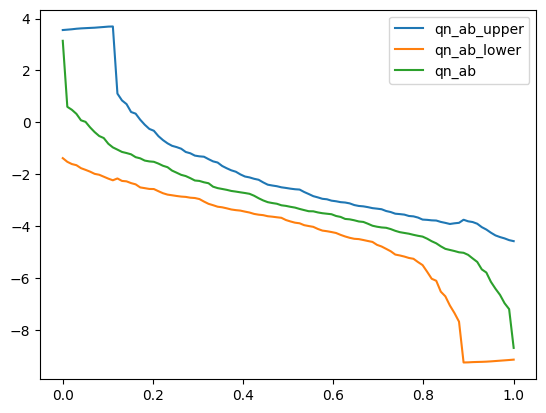

In [ ]:
plt.plot(pct,qn_ab_upper,label="qn_ab_upper")
plt.plot(pct,qn_ab_lower,label="qn_ab_lower")
plt.plot(pct,qn_ab,label="qn_ab")
plt.legend()
plt.show()


In [ ]:
qn_ab_lower[np.isfinite(qn_ab_lower)].max()

-1.3803864195940392

In [ ]:
ln_ab=np.maximum(
    np.abs(
        qn_ab_upper[np.isfinite(qn_ab_upper)].min()
        ),
    np.abs(
        qn_ab_lower[np.isfinite(qn_ab_lower)].max()
    )
)
ln_ab

4.5795573978991095

In [ ]:
un_ab=np.maximum(
    np.abs(
        qn_ab_lower[np.isfinite(qn_ab_lower)].min()
        ),
    np.abs(
        qn_ab_upper[np.isfinite(qn_ab_upper)].max()
    )
)
un_ab

9.255640581077893

# Calcuation of threshold Tau ($\tau$)


$\tau$ is defined as:

${U_{n_a,n_b} (\alpha) \le \tau} $

We are choosing $\tau$ to be ${U_{n_a,n_b} (\alpha)+1}$ for this POC

In [ ]:
tau=un_ab+1
tau
# tau=0.05

10.255640581077893

# Choosing Radius (r):



Radius(r) is defined as:

${r \le \tau/2}$

We are choosing r to be ${(\tau/2) - 1}$


In [ ]:
# r=0.02
r=tau/2-1
r

4.1278202905389465

# Sample size calcuation

Sample size(n) can be calcuated as follows:

$n = 2 \frac{\log (4/\alpha)}{r^2}$

In [ ]:
# n=2*(np.log(4/alpha))/(r**2)
n=14
n

14

In [ ]:
epsn=eps_quantiles(0.05,n)
epsn

0.7037383748693672

In [ ]:
epsn=eps_quantiles(0.05,1000)
epsn

0.08656912837667055

# Stopping rules for $A \le B$:

$\sup {d^{l}_{n_a,n_b}(\alpha,x)>0}$

In [ ]:
stop_factor=qn_ab_lower[np.isfinite(qn_ab_lower)].max()
print(f"Stop factor:{stop_factor}")
if stop_factor>0:
  print("B>A: Stopping rule satisfied")
else:
  print("B<A: Stopping rule not satisfied")

Stop factor:-1.3803864195940392
B<A: Stopping rule not satisfied


## P-value for ${A \le B}$:


## ${P^{\le}_{n_a,n_b}=2e^{- \frac {n||d^{+}_{n_a,n_b}||^{2}_ ∞} {2}}}$


In [ ]:
# n=len(A)
qn_ab_plus=np.maximum(np.max(qn_ab),0)
p_value=2*np.exp(-(n*(qn_ab_plus**2))/(2))
p_value

1.9922545410333095e-30

In [ ]:
qn_ab_plus

3.1414608302903346

$P^{\le}_{n_a,n_b} = \frac {3624}{e^{\frac {n(\frac {\frac{||d^{+}_{n_a,n_b}||_{\infty}}{2}}{0.85})^{2}-\log log(en)}{0.8}}}$

In [ ]:
#works good
# n=len(A)
# numerator = qn_ab_plus / (2 * 0.85)
numerator = (qn_ab_plus) / (0.85)
log_term = np.log(np.log(np.exp(1) * n))
# Debugging: Log intermediate values
print(f"numerator: {numerator}")
print(f"log_term: {log_term}")
exponent = (n * (numerator ** 2 - log_term)) / 0.8
# Debugging: Log intermediate values
print(f"exponent: {exponent}")
term2 = np.exp(exponent)
p_value = 3624 / term2

numerator: 1.8479181354649028
log_term: 1.2917246727283112
exponent: 37.153843346406


In [ ]:
p_value

2.6514231396558476e-13

In [ ]:
np.sqrt(p_value)

5.149197160389033e-07

# References
[1] [ECDF](https://machinelearningmastery.com/empirical-distribution-function-in-python/)

[2] [Inverse distribtion functions](https://stats.stackexchange.com/questions/212813/help-me-understand-the-quantile-inverse-cdf-function)